In [4]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/content/Titanic-Dataset.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
# Step 2: Handle missing values
# Fill numerical columns with median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [9]:
# Fill categorical columns with mode
cat_cols = df.select_dtypes(exclude=[np.number]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [12]:
train =df.head()

In [13]:

train.drop(["PassengerId",'Ticket'],axis = 1,inplace = True)

/tmp/ipython-input-946487818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(["PassengerId",'Ticket'],axis = 1,inplace = True)


In [14]:

train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,5.000000,5.000000,5.00000,5.000000,5.0,5.000000
mean,0.600000,2.200000,31.20000,0.600000,0.0,29.521660
std,0.547723,1.095445,6.83374,0.547723,0.0,30.510029
min,0.000000,1.000000,22.00000,0.000000,0.0,7.250000
25%,0.000000,1.000000,26.00000,0.000000,0.0,7.925000
50%,1.000000,3.000000,35.00000,1.000000,0.0,8.050000
75%,1.000000,3.000000,35.00000,1.000000,0.0,53.100000
max,1.000000,3.000000,38.00000,1.000000,0.0,71.283300


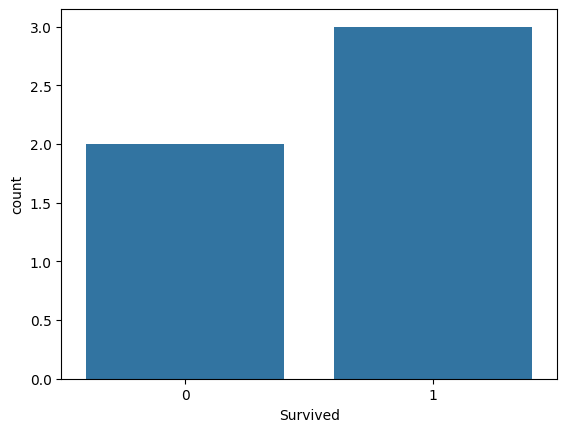

In [15]:
sns.countplot(x='Survived', data=train);

In the training set:

38.3% people survived

More number of people were actually in 3rd class

50% of passengers were in between the age of 20 to 38


Since the survival rate is 0.38, even if I decide to give a submission of all passengers being perished, I would still be having a accuracy of 62%. So accuracy cannot be considered as the only measure in saying how good the model is.

In [17]:
train.groupby(['Survived','Sex'])['Survived'].count()

,,Survived
Survived,Sex,
0,male,2
1,female,3


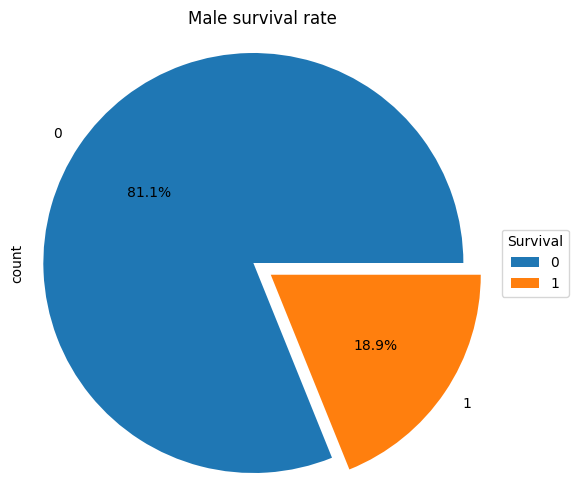

In [19]:
# Calculate survival counts for males in the full dataset
male_survival_counts = df[df['Sex'] == 'male']['Survived'].value_counts().sort_index()

# Create an explode list with the same length as the survival counts
explode_list = [0.05] * len(male_survival_counts)

# Plot the pie chart
male_survival_counts.plot(kind='pie', figsize=(6, 6), explode=explode_list, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels=male_survival_counts.index, title="Survival", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Male survival rate")
plt.show()

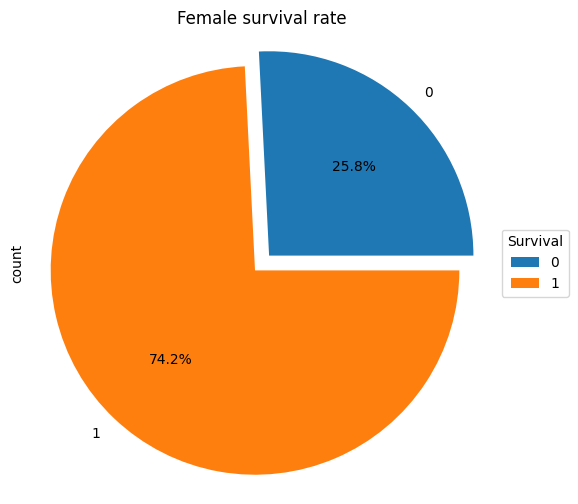

In [21]:
# Calculate survival counts for females in the full dataset
female_survival_counts = df[df['Sex'] == 'female']['Survived'].value_counts().sort_index()

# Create an explode list with the same length as the survival counts
explode_list = [0.05] * len(female_survival_counts)

# Plot the pie chart
female_survival_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), explode=explode_list)
plt.axis('equal')
plt.title("Female survival rate")
plt.legend(labels=female_survival_counts.index, title="Survival", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [22]:
pd.crosstab(train.Pclass, train.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,0,2,2
3,2,1,3
All,2,3,5


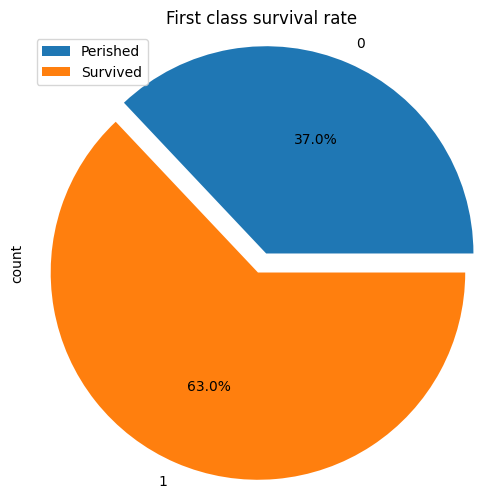

In [25]:
# Calculate survival counts for first class passengers in the full dataset
pclass1_survival_counts = df[df['Pclass'] == 1]['Survived'].value_counts().sort_index()

# Create an explode list with the same length as the survival counts
explode_list = [0.05] * len(pclass1_survival_counts)

# Plot the pie chart
pclass1_survival_counts.plot(kind='pie', figsize=(6, 6),explode=explode_list,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("First class survival rate")
plt.show()

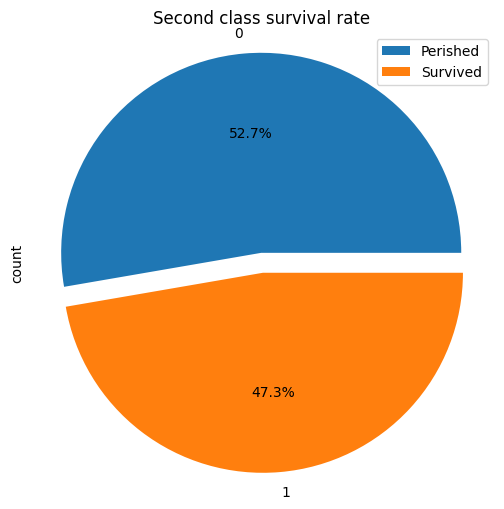

In [27]:
# Calculate survival counts for second class passengers in the full dataset
pclass2_survival_counts = df[df['Pclass'] == 2]['Survived'].value_counts().sort_index()

# Create an explode list with the same length as the survival counts
explode_list = [0.05] * len(pclass2_survival_counts)

# Plot the pie chart
pclass2_survival_counts.plot(kind='pie', figsize=(6, 6),explode=explode_list,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Second class survival rate")
plt.show()

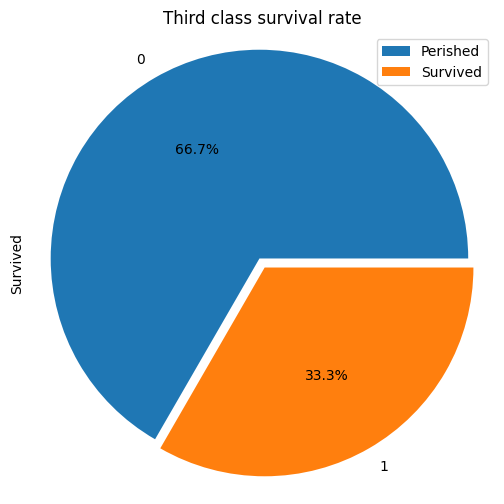

In [26]:
train[train['Pclass'] == 3].Survived.groupby(train.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Third class survival rate")
plt.show()

In [28]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True)

,Pclass,1,3,All
Sex,Survived,,,
female,1,2,1,3
male,0,0,2,2
All,,2,3,5


In [29]:
sns.barplot('Pclass','Survived',hue='Sex', data=train)

TypeError: barplot() got multiple values for argument 'data'

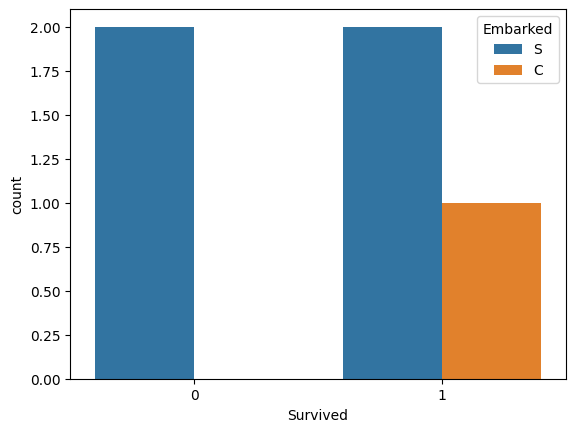

In [30]:
sns.countplot(x='Survived', data=train,hue = 'Embarked');

In [31]:
pd.crosstab([train.Sex, train.Survived], [train.SibSp, train.Pclass], margins=True)

SibSp            0  1    All
Pclass           3  1  3    
Sex    Survived             
female 1         1  2  0   3
male   0         1  0  1   2
All              2  2  1   5

The above crosstab indicates 2 things:

Most of the passerenges didn'y had siblings onboard and the majority had atmost 1 sibling onboard

Not much of priority was given to the passengers who had sibelings onboard in the rescue operation

In [32]:
pd.crosstab([train.Sex, train.Survived], [train.Parch, train.Pclass], margins=True)

Parch            0    All
Pclass           1  3    
Sex    Survived          
female 1         2  1   3
male   0         0  2   2
All              2  3   5

In [34]:
# Drop non-numeric columns before calculating correlation
df_numeric = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_numeric.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


In [35]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,B96 B98,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,B96 B98,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,B96 B98,S


<Axes: xlabel='Pclass', ylabel='Fare'>

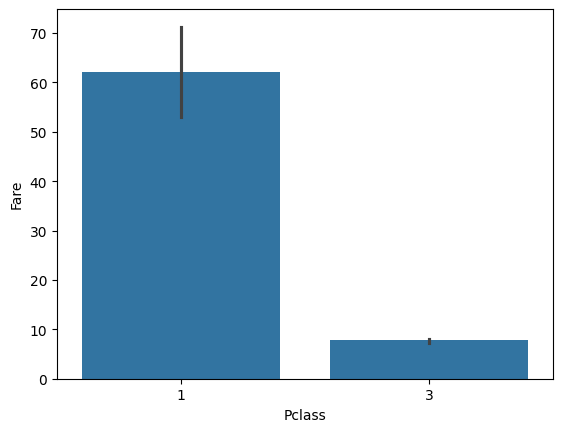

In [36]:
sns.barplot(y = "Fare",x = "Pclass",data = train)

<Axes: xlabel='Pclass', ylabel='Fare'>

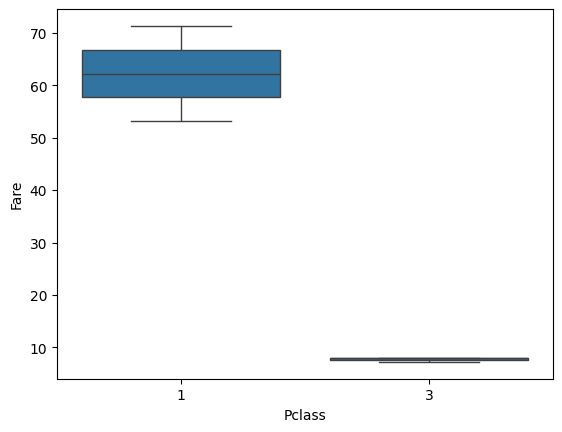

In [38]:
sns.boxplot(y = "Fare",x = "Pclass",data = train[train["Fare"] < 200])

<Axes: xlabel='Pclass', ylabel='Fare'>

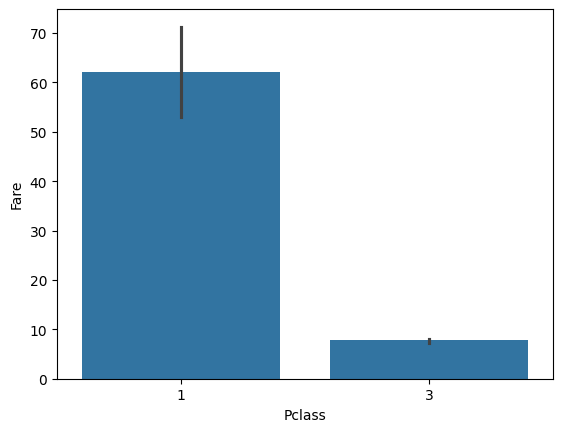

In [39]:
sns.barplot(y = "Fare",x = "Pclass",data = train[train["Fare"] < 200])

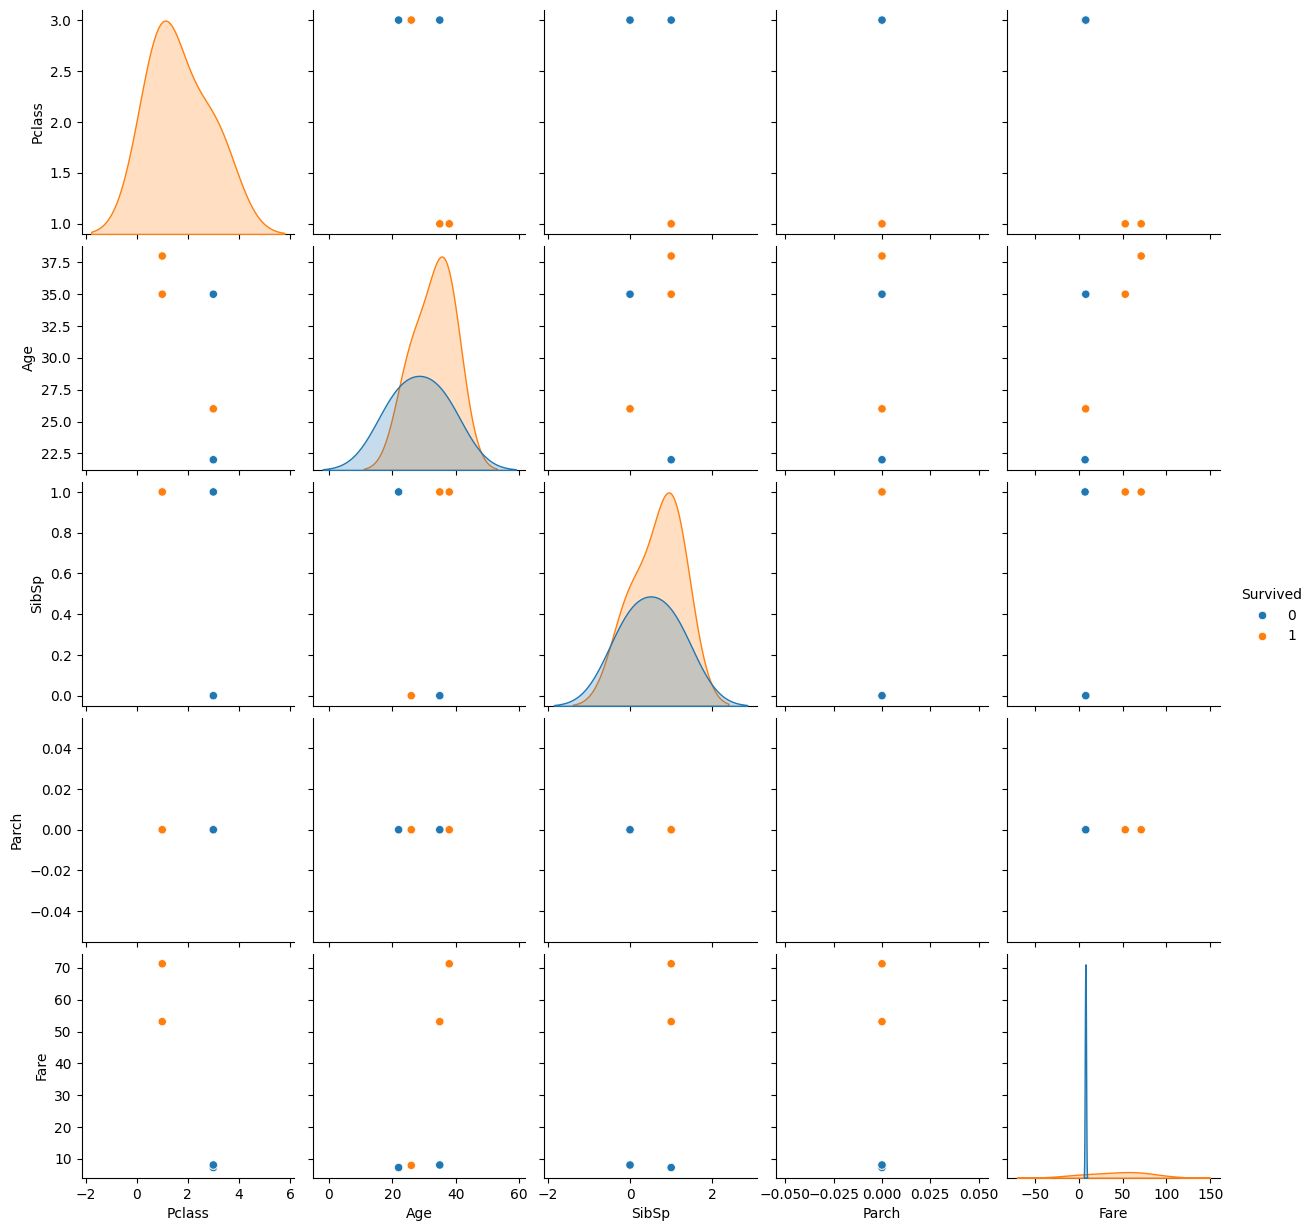

In [40]:
sns.pairplot(train.drop("Name",axis = 1).dropna(),hue = "Survived")

In [41]:
train.groupby('Survived').describe()['Age']

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,2.0,28.5,9.192388,22.0,25.25,28.5,31.75,35.0
1,3.0,33.0,6.244998,26.0,30.50,35.0,36.50,38.0


In [42]:

def extract(x):
    temp = x.split(" ")
    if "Mr." in temp:
        return "Mr"
    elif "Mrs." in temp:
        return "Mrs"
    elif "Miss." in temp:
        return "Miss"
    elif "Master." in temp:
        return "Master"
    elif "Dr." in temp:
        return "Dr"
    else:
        return None

In [43]:
train["Category"] = train["Name"].apply(extract)

/tmp/ipython-input-1641315654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Category"] = train["Name"].apply(extract)


In [44]:
train["Category"].unique()

array(['Mr', 'Mrs', 'Miss'], dtype=object)

In [45]:
print("Mr." , np.mean(train[train["Category"] == "Mr"]["Age"]))
print("Mrs." , np.mean(train[train["Category"] == "Mrs"]["Age"]))
print("Miss." , np.mean(train[train["Category"] == "Miss"]["Age"]))
print("Master." , np.mean(train[train["Category"] == "Master"]["Age"]))
print("Dr." , np.mean(train[train["Category"] == "Dr"]["Age"]))

Mr. 28.5
Mrs. 36.5
Miss. 26.0
Master. nan
Dr. nan
